In [130]:
import os

In [131]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualization and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# configures matplotlib to inline and will display graphs below the corresponding cell
%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid', color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess
from keras.preprocessing.image import ImageDataGenerator

#libraries
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

#for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

import tensorflow as tf
import random as rn

#manipulation of zipped images and getting numpy arrays of pixel values of images
import cv2
import numpy as np
from tqdm import tqdm
import os
from random import shuffle
from zipfile import ZipFile
from PIL import Image

In [132]:
X = []
Z = []
IMG_SIZE = 150
BEE_BLUEBERRY_DIR = '../bees/blueberrybees'
BEE_BUMBLE_DIR = '../bees/bumblebees'
BEE_CARPENTER_DIR = '../bees/carpenterbees'
BEE_HONEY_DIR = '../bees/honeybees'
BEE_MASON_DIR = '../bees/masonbees'
BEE_MINING_DIR = '../bees/miningbees'
BEE_WESTERNHONEY_DIR = '../bees/westernhoneybees'

In [133]:
def assign_label(img,bee_type):
    return bee_type

In [134]:
def make_train_data(bee_type, DIR):
    for img in tqdm(os.listdir(DIR)):
        label = assign_label(img, bee_type)
        path = os.path.join(DIR, img)
        ext = img[-4:]
        if (ext != '.jpg'):
            continue
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [135]:
make_train_data('Blueberry Bee', BEE_BLUEBERRY_DIR)
print(len(X))

100%|██████████| 1201/1201 [00:03<00:00, 310.53it/s]

785


In [136]:
make_train_data('Bumblebee', BEE_BUMBLE_DIR)
print(len(X))

100%|██████████| 707/707 [00:03<00:00, 205.73it/s]

1451


In [137]:
make_train_data('Carpenter Bee', BEE_CARPENTER_DIR)
print(len(X))

100%|██████████| 612/612 [00:02<00:00, 235.11it/s]

2025


In [138]:
make_train_data('Honey Bee', BEE_HONEY_DIR)
print(len(X))

100%|██████████| 634/634 [00:03<00:00, 173.30it/s]

2621


In [139]:
make_train_data('Mason Bee', BEE_MASON_DIR)
print(len(X))

100%|██████████| 1737/1737 [00:05<00:00, 301.28it/s]

3759


In [140]:
make_train_data('Mining Bee', BEE_MINING_DIR)
print(len(X))

100%|██████████| 1417/1417 [00:04<00:00, 305.74it/s]

4705


In [141]:
make_train_data('Western Honey Bees', BEE_WESTERNHONEY_DIR)
print(len(X))

100%|██████████| 2016/2016 [00:06<00:00, 333.75it/s]

5924


In [142]:
# Gaussian Blur
# def blur():
#     for i in range(1, len(X)):
#         X[i] = cv2.GaussianBlur(X[i], (5, 5), 0) 

# Preprocessing
for i in range(len(X)):
    # Gaussian Blur
    X[i] = cv2.GaussianBlur(X[i], (5, 5), 0)
    
#     # Image Segmentation
#     gray = cv2.cvtColor(X[i], cv2.COLOR_RGB2GRAY)
#     ret, X[i] = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
#     # Further noise removal
#     kernel = np.ones((3, 3), np.uint8)
#     opening = cv2.morphologyEx(X[i], cv2.MORPH_OPEN, kernel, iterations=2)
#     # sure background area
#     sure_bg = cv2.dilate(opening, kernel, iterations=3)
#     # Finding sure foreground area
#     dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
#     ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
#     # Finding unknown region
#     sure_fg = np.uint8(sure_fg)
#     unknown = cv2.subtract(sure_bg, sure_fg)

#     # Marker labelling
#     ret, markers = cv2.connectedComponents(sure_fg)
#     # Add one to all labels so that sure background is not 0, but 1
#     markers = markers + 1
#     # Now, mark the region of unknown with zero
#     markers[unknown == 255] = 0
#     markers = cv2.watershed(X[i], markers)
#     X[i][markers == -1] = [255, 0, 0]

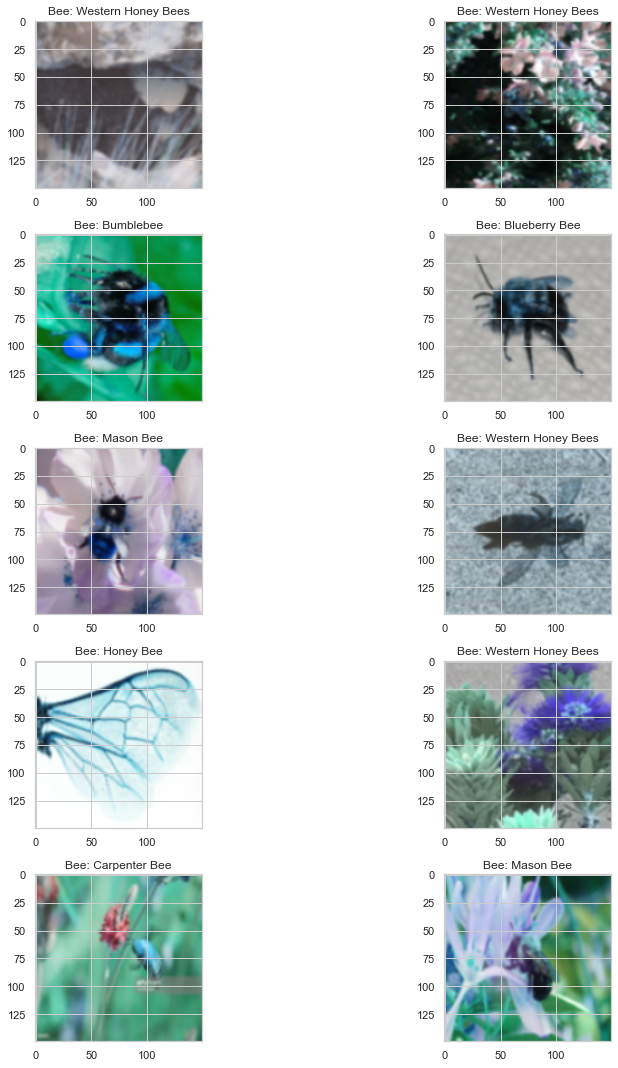

In [143]:
#visualize 10 random images with blurring preprocessing
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range(2):
        l=rn.randint(0,len(Z))
        ax[i, j].imshow(X[l])
        ax[i,j].set_title('Bee: '+Z[l])
plt.tight_layout()

In [144]:
# label encoding
le=LabelEncoder()
Y=le.fit_transform(Z)
# Y=to_categorical(Y,15)
Y=to_categorical(Y,7)
X=np.array(X)
X=X/255

In [145]:
#splitting into training and validation sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [146]:
#inputting the random seeds
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

In [147]:
# Using CNN to start modelling

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

#model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
#model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(7, activation = "softmax"))

In [148]:
# Using a LR Annealer

batch_size=128
epochs=100

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [149]:
# data augmentation to prevent overfitting

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [150]:
# compiling the model & summary
model.compile(optimizer=Adam(lr=0.001),
              loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 96)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 31104)            

In [151]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage

In [152]:
# fitting training set and making predictions on the validation set
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/100
34/34 [==============================] - 95s 3s/step - loss: 1.9747 - accuracy: 0.1961 - val_loss: 1.8916 - val_accuracy: 0.2194
Epoch 2/100
34/34 [==============================] - 98s 3s/step - loss: 1.8767 - accuracy: 0.2118 - val_loss: 1.8335 - val_accuracy: 0.2606
Epoch 3/100
34/34 [==============================] - 110s 3s/step - loss: 1.8350 - accuracy: 0.2450 - val_loss: 1.8114 - val_accuracy: 0.2674
Epoch 4/100
34/34 [==============================] - 101s 3s/step - loss: 1.8008 - accuracy: 0.2767 - val_loss: 1.8022 - val_accuracy: 0.2856
Epoch 5/100
34/34 [==============================] - 82s 2s/step - loss: 1.7868 - accuracy: 0.2869 - val_loss: 1.7135 - val_accuracy: 0.3471
Epoch 6/100
34/34 [==============================] - 68s 2s/step - loss: 1.7322 - accuracy: 0.3129 - val_loss: 1.7116 - val_accuracy: 0.3194
Epoch 7/100
34/34 [==============================] - 69s 2s/step - loss: 1.7125 - accuracy: 0.3131 - val_loss: 1.6756 - val_accuracy: 0.3477
Epoch 8/100

Epoch 59/100
34/34 [==============================] - 72s 2s/step - loss: 0.4874 - accuracy: 0.8375 - val_loss: 0.9559 - val_accuracy: 0.7252
Epoch 60/100
34/34 [==============================] - 76s 2s/step - loss: 0.4886 - accuracy: 0.8313 - val_loss: 0.8901 - val_accuracy: 0.7488
Epoch 61/100
34/34 [==============================] - 70s 2s/step - loss: 0.4810 - accuracy: 0.8327 - val_loss: 0.9621 - val_accuracy: 0.7441
Epoch 62/100
34/34 [==============================] - 67s 2s/step - loss: 0.4567 - accuracy: 0.8438 - val_loss: 0.8877 - val_accuracy: 0.7387
Epoch 63/100
34/34 [==============================] - 66s 2s/step - loss: 0.4616 - accuracy: 0.8431 - val_loss: 0.8642 - val_accuracy: 0.7623
Epoch 64/100
34/34 [==============================] - 67s 2s/step - loss: 0.4428 - accuracy: 0.8543 - val_loss: 0.8664 - val_accuracy: 0.7630
Epoch 65/100
34/34 [==============================] - 69s 2s/step - loss: 0.4296 - accuracy: 0.8565 - val_loss: 0.9812 - val_accuracy: 0.7481
Epoch 

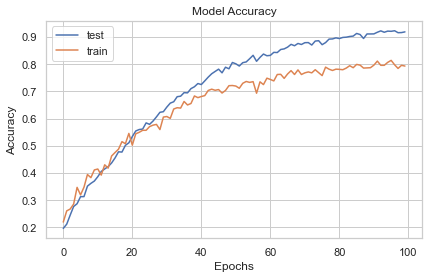

In [153]:
# graph for model accuracy between training and validation
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['test', 'train'])
plt.show()

In [157]:
# print(x_test)
predictions = model.predict(x_test)
# print(predictions)
# print(predictions[0])

In [158]:
class_names = ['Blueberry Bee', 'Bumblebee', 'Carpenter Bee', 'Honey Bee',
               'Mason Bee', 'Mining Bee', 'Western Honey Bee']

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(7))
  plt.yticks([])
  thisplot = plt.bar(range(7), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

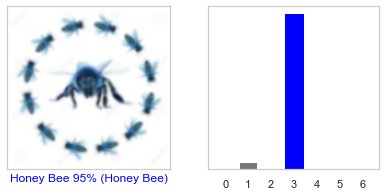

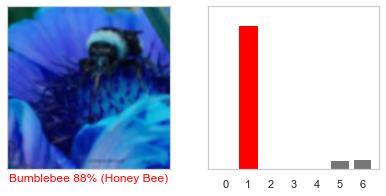

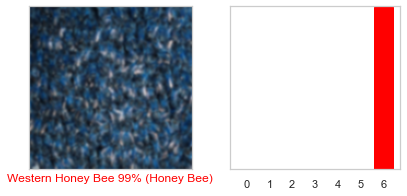

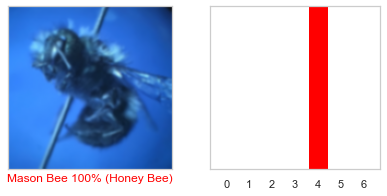

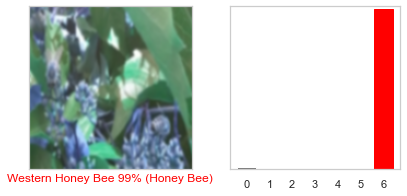

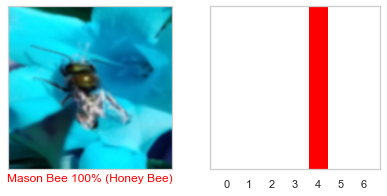

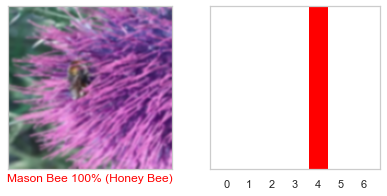

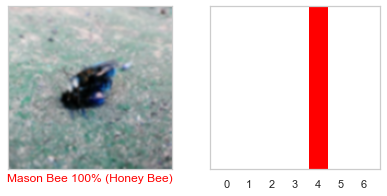

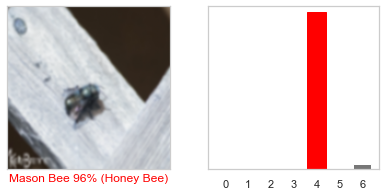

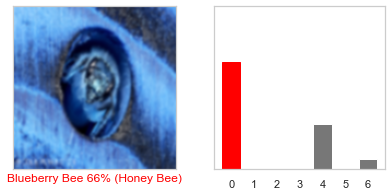

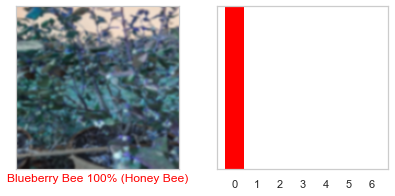

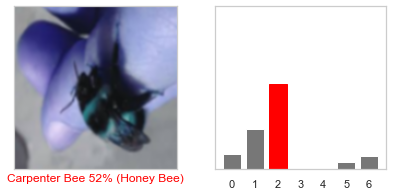

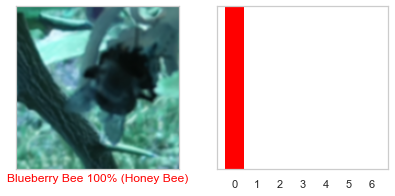

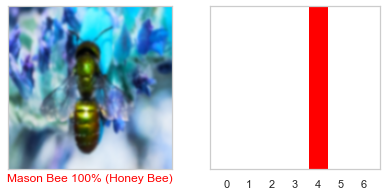

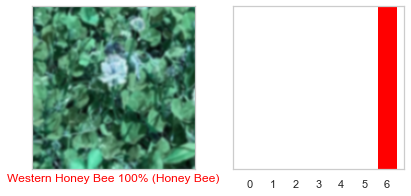

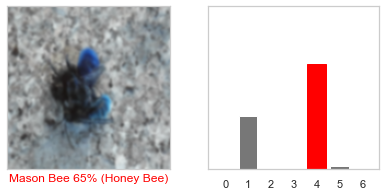

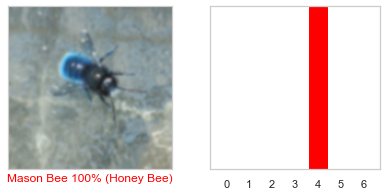

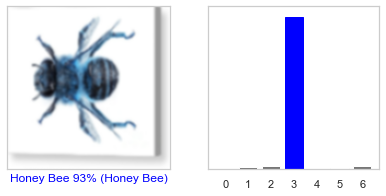

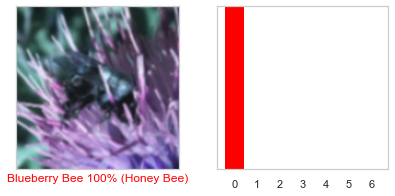

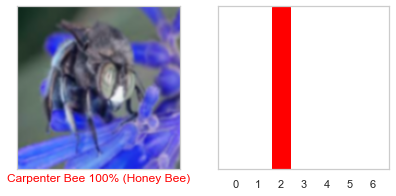

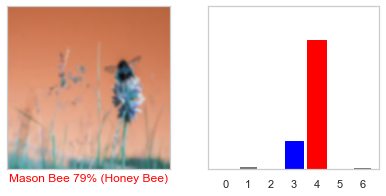

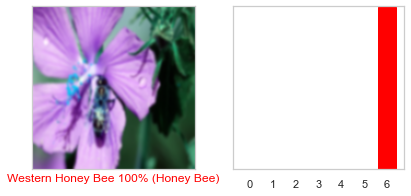

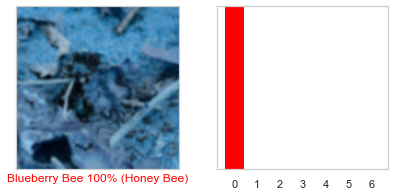

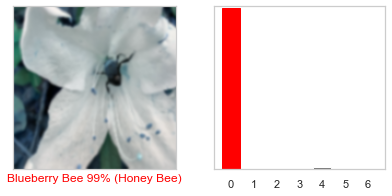

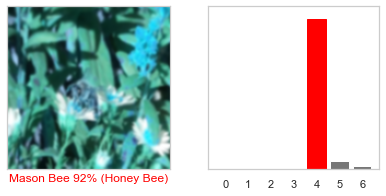

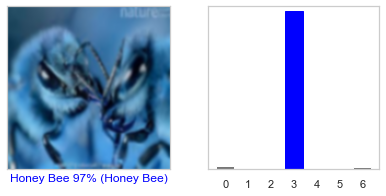

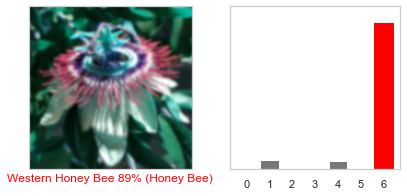

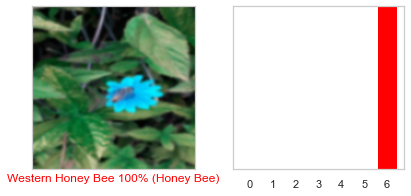

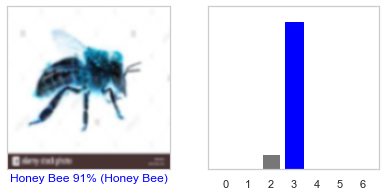

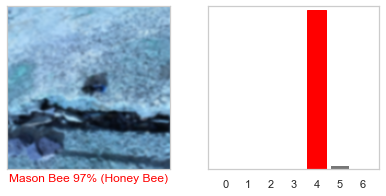

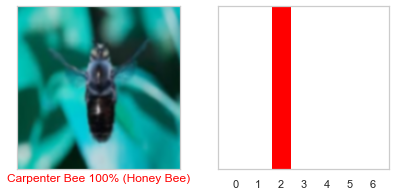

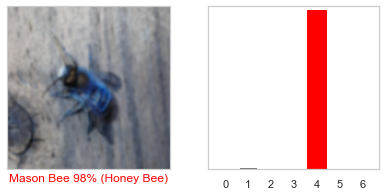

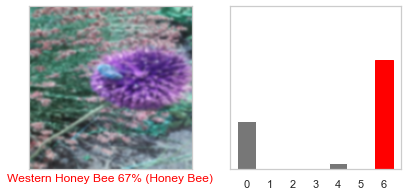

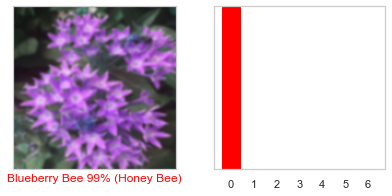

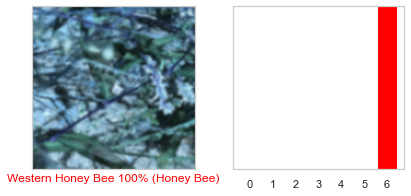

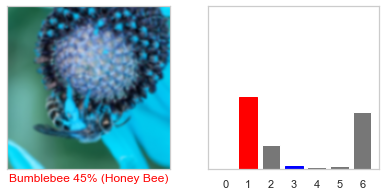

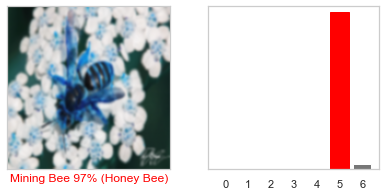

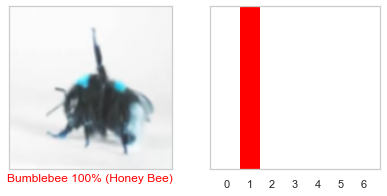

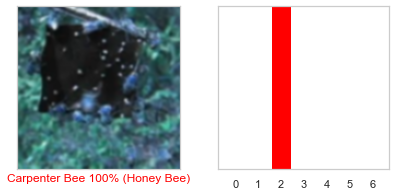

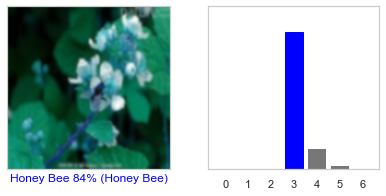

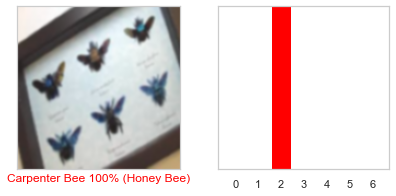

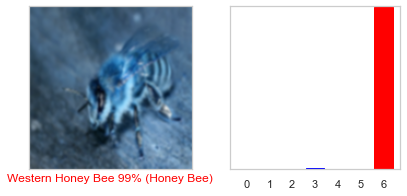

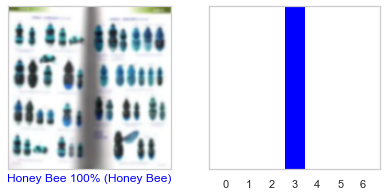

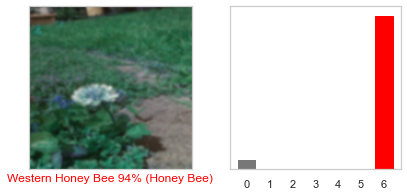

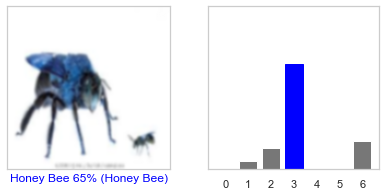

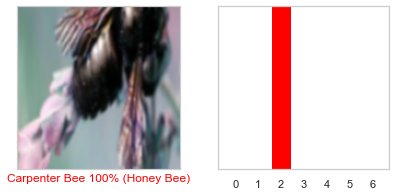

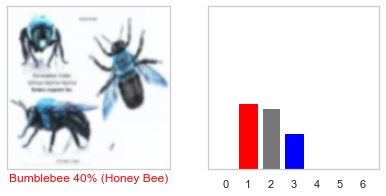

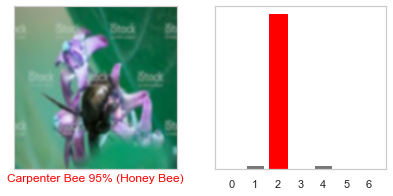

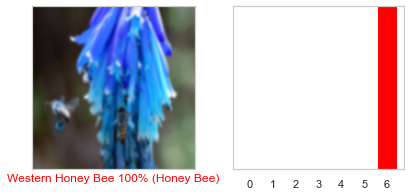

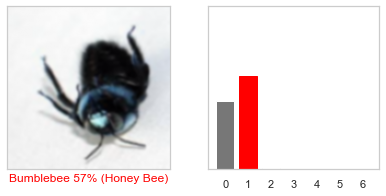

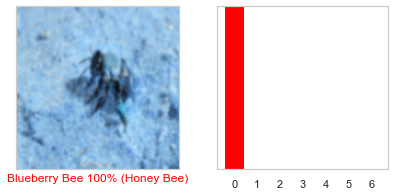

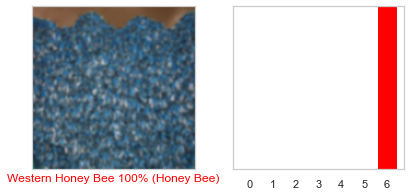

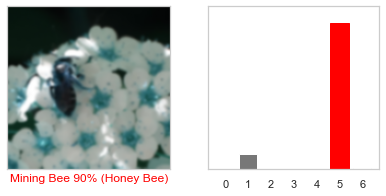

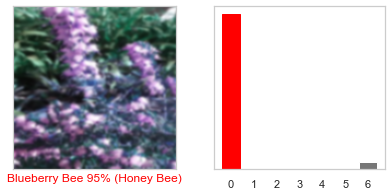

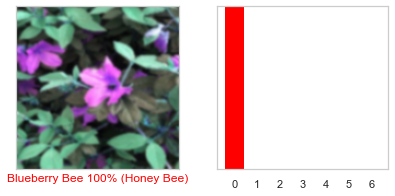

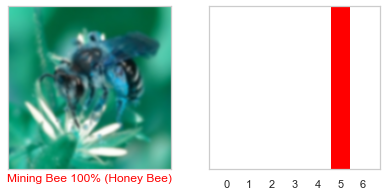

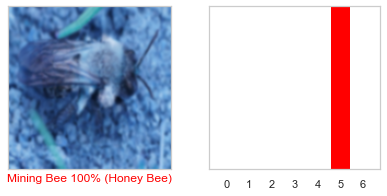

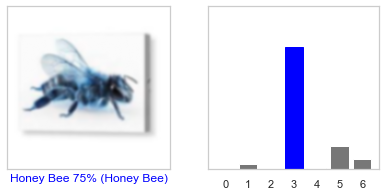

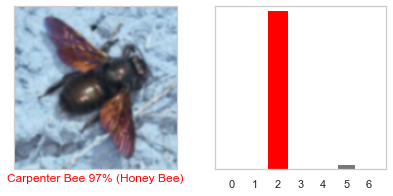

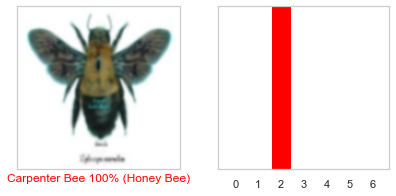

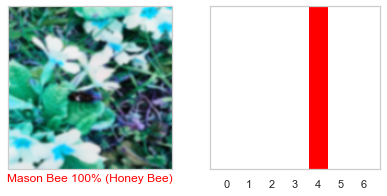

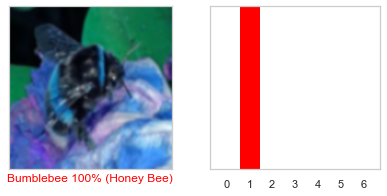

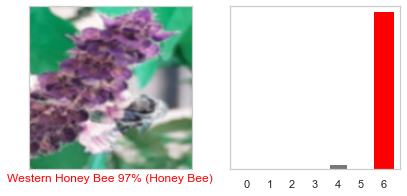

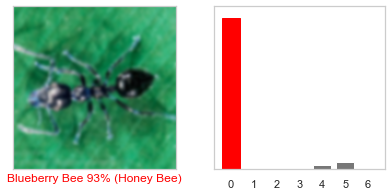

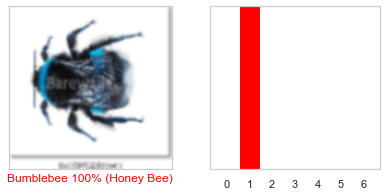

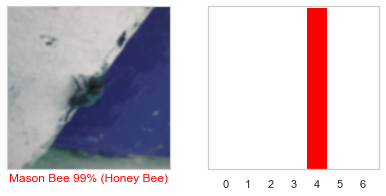

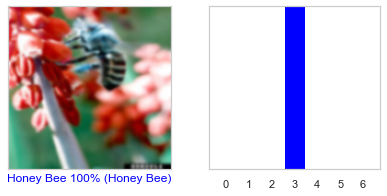

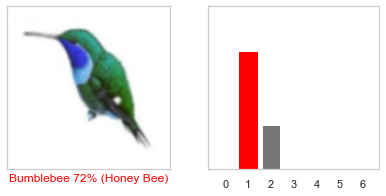

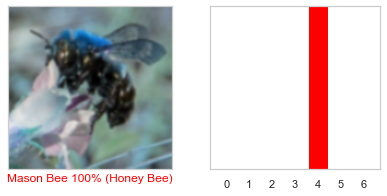

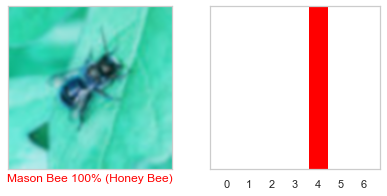

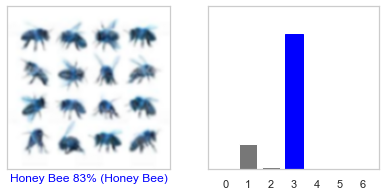

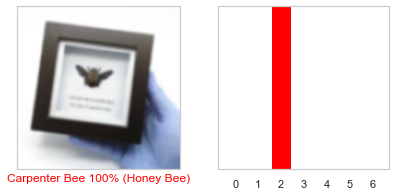

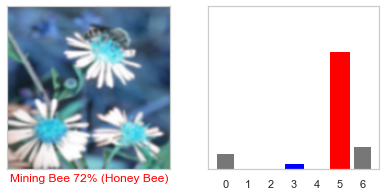

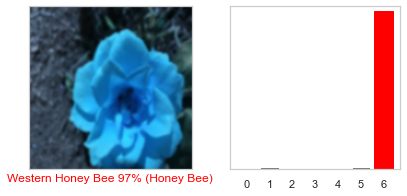

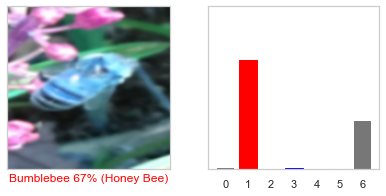

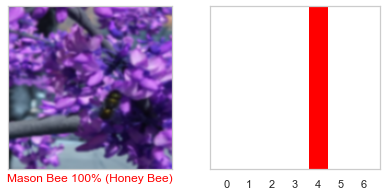

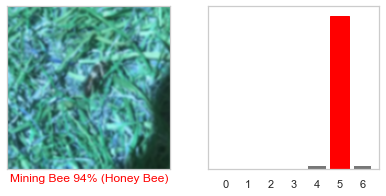

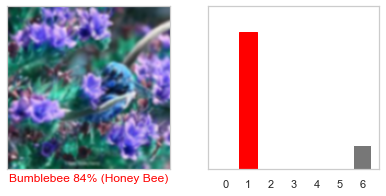

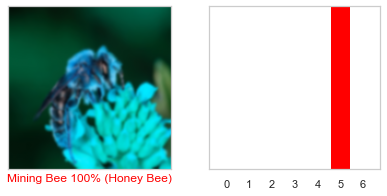

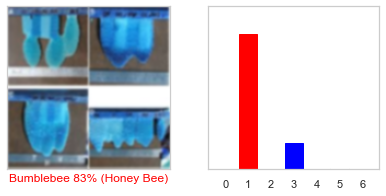

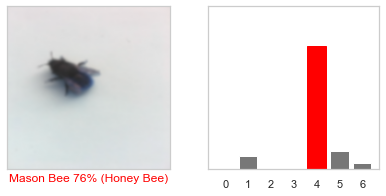

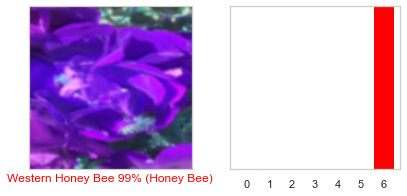

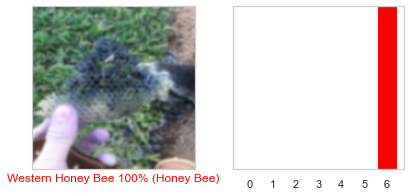

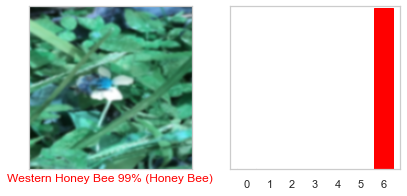

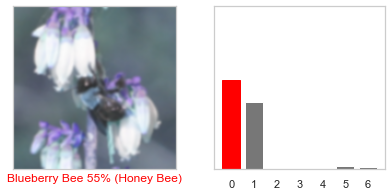

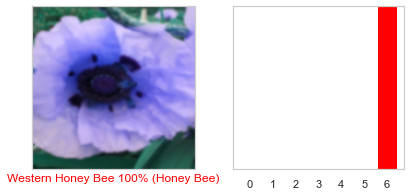

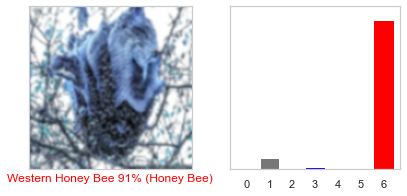

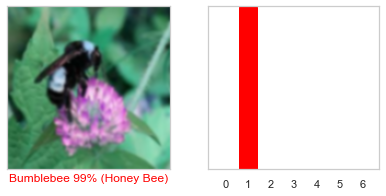

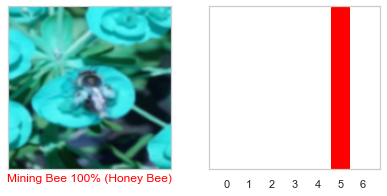

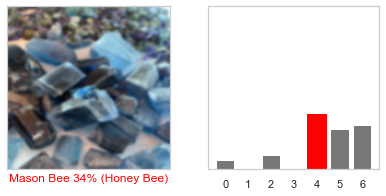

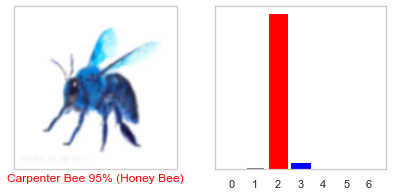

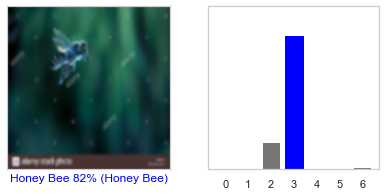

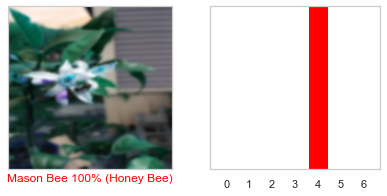

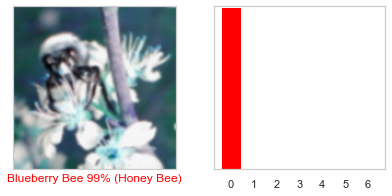

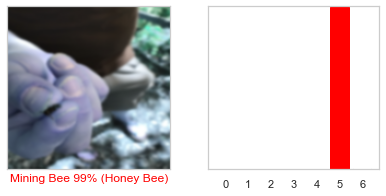

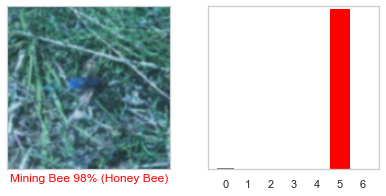

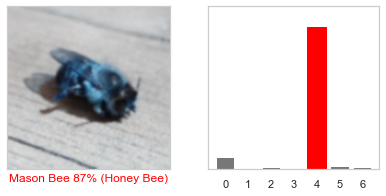

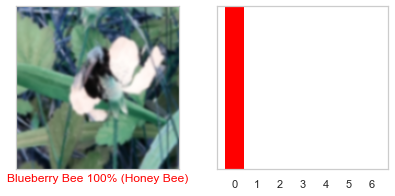

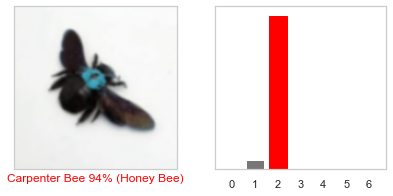

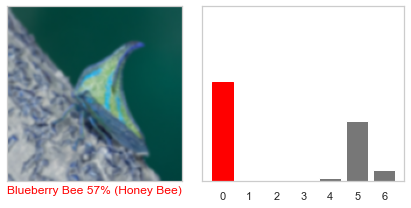

In [159]:
y_ = [np.argmax(y_test, axis=None, out=None) for y in y_test]
for i in range(100):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions[i], y_, x_test)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions[i], y_)
    #plt.show()
plt.tight_layout()

In [160]:
# export bee model
model_path = "../bee_model_v0"
model.save(model_path)

INFO:tensorflow:Assets written to: bee_model_v0/assets


In [161]:
# load bee model
from tensorflow import keras
loaded_model = keras.models.load_model(model_path)

In [162]:
# verify that the exported model works properly
prediction_by_model = model.predict(x_test)
prediction_by_loaded_model = loaded_model.predict(x_test)

In [94]:
print(prediction_by_model[0])
print(prediction_by_loaded_model[0])

[1.1698349e-14 1.9043775e-06 3.7172501e-06 9.9999416e-01 1.1815338e-10
 1.7358225e-07 1.3354759e-07]
[1.1698349e-14 1.9043775e-06 3.7172501e-06 9.9999416e-01 1.1815338e-10
 1.7358225e-07 1.3354759e-07]


In [163]:
from tensorflow.keras.preprocessing.image import img_to_array
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image

def classify(img_path, saved_model, class_names):
    # Preprocess image
    IMG_SIZE = 150
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = cv2.GaussianBlur(img, (5, 5), 0)
    img = img.astype("float") / 255.0
    img_array = image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    
    prediction = saved_model.predict(img_batch)
    # print(prediction)
    print(class_names[np.argmax(prediction)] + '(' + str(round(100*np.max(prediction), 2)) + '%)')

In [164]:
class_names = ['Blueberry Bee', 'Bumblebee', 'Carpenter Bee', 'Honey Bee',
               'Mason Bee', 'Mining Bee', 'Western Honey Bee']

In [166]:
# classify(x_test[0], loaded_model, class_names)
classify('../test_images/honey_bee_1.jpg', loaded_model, class_names)

Honey Bee(97.98%)


In [167]:
classify('../test_images/carpenter_bee_1.jpg', loaded_model, class_names)

Carpenter Bee(57.64%)


In [169]:
classify('../test_images/western_honey_bee_1.jpg', loaded_model, class_names)

Mining Bee(67.76%)


In [170]:
classify('../test_images/mason_bee_1.jpg', loaded_model, class_names)

Mining Bee(99.98%)
